# Зависимости

In [31]:
import pandas as pd
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, matthews_corrcoef
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# EDA (exploratory data analysis)

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv').drop('id', axis=1)
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv').drop('id', axis=1)
df_train

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [3]:
df_train.describe()

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


In [5]:
df_train.isna().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [6]:
df_test.isna().sum()

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [7]:
df_train['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

In [8]:
df_train['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [9]:
df_train['cap-shape'].value_counts()

cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [10]:
def keep_only_char(value):
    if isinstance(value, str) and len(value) == 1 and value.isalpha():
        return value
    else:
        return "Unknown"

In [11]:
only_categorial_df = df_train.select_dtypes(include='object').drop('class', axis=1)
for col in only_categorial_df:
    df_train[col] = df_train[col].map(keep_only_char)
    df_test[col] = df_test[col].map(keep_only_char)

In [12]:
df_train.isna().sum()

class                   0
cap-diameter            4
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [13]:
trash = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']
df_train.drop(trash, axis=1, inplace=True)
df_test.drop(trash, axis=1, inplace=True)
df_train.isna().sum()

class                   0
cap-diameter            4
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [14]:
df_test.isna().sum()

cap-diameter            7
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             1
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [15]:
df_train['cap-diameter'] = df_train['cap-diameter'].fillna(df_train['cap-diameter'].mean())
df_test['cap-diameter'] = df_test['cap-diameter'].fillna(df_test['cap-diameter'].mean())
df_test['stem-height'] = df_test['stem-height'].fillna(df_test['stem-height'].mean())
df_train.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [16]:
df_test.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [17]:
only_categorial_df = df_train.select_dtypes(include='object').drop('class', axis=1)
for col in only_categorial_df:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [18]:
df_train.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [19]:
df_test.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [20]:
df_train

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,Unknown,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,l,w,f,d,Unknown,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,Unknown,n,t,Unknown,Unknown,w,12.14,18.81,w,t,g,d,u
3116941,e,10.88,s,Unknown,w,t,d,c,p,6.65,26.97,w,f,f,d,u
3116942,p,7.82,x,e,e,f,a,Unknown,w,9.51,11.06,y,t,z,d,a
3116943,e,9.45,p,i,n,t,e,Unknown,p,9.13,17.77,w,t,p,d,u


In [21]:
le = LabelEncoder()
df_train['class'] = le.fit_transform(df_train['class'])
df_train

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,0,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,0,3.88,f,y,g,f,s,Unknown,g,4.16,6.53,w,f,f,d,u
4,0,5.85,x,l,w,f,d,Unknown,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,f,Unknown,n,t,Unknown,Unknown,w,12.14,18.81,w,t,g,d,u
3116941,0,10.88,s,Unknown,w,t,d,c,p,6.65,26.97,w,f,f,d,u
3116942,1,7.82,x,e,e,f,a,Unknown,w,9.51,11.06,y,t,z,d,a
3116943,0,9.45,p,i,n,t,e,Unknown,p,9.13,17.77,w,t,p,d,u


In [22]:
sc = StandardScaler()
df_train_with_normalize = df_train.copy()
df_test_with_normalize = df_test.copy()

numerical_df = df_train.select_dtypes(include='float64')
cols = numerical_df.columns

df_train_with_normalize[cols] = sc.fit_transform(df_train[cols])
df_test_with_normalize[cols] = sc.transform(df_test[cols])
df_train_with_normalize

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,0.534605,f,s,u,f,a,c,w,-0.680926,0.523282,w,f,f,d,a
1,1,-0.386405,x,h,o,f,a,c,n,-0.577213,-0.577333,o,t,z,d,w
2,0,0.135286,f,s,b,f,x,c,w,0.185819,-0.151169,n,f,f,l,w
3,0,-0.521659,f,y,g,f,s,Unknown,g,-0.810568,-0.571157,w,f,f,d,u
4,0,-0.098724,x,l,w,f,d,Unknown,w,-1.103187,-0.345105,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,0.639802,f,Unknown,n,t,Unknown,Unknown,w,2.145257,0.945740,w,t,g,d,u
3116941,0,0.981156,s,Unknown,w,t,d,c,p,0.111739,1.953710,w,f,f,d,u
3116942,1,0.324211,x,e,e,f,a,Unknown,w,1.171094,-0.011585,y,t,z,d,a
3116943,0,0.674152,p,i,n,t,e,Unknown,p,1.030341,0.817273,w,t,p,d,u


In [23]:
df_test_with_normalize

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.500255,x,Unknown,n,t,Unknown,Unknown,w,1.771149,0.736981,w,t,g,d,a
1,0.126698,o,t,o,f,Unknown,c,y,-1.881035,-0.049878,n,f,f,d,a
2,-0.925272,b,g,n,f,Unknown,c,n,-0.062351,-0.989909,n,f,f,d,s
3,-0.609681,x,t,n,f,s,c,n,-0.506836,-0.326576,w,t,z,d,u
4,-0.030024,x,h,y,f,p,Unknown,y,0.141371,0.314523,y,t,Unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.165722,x,g,w,f,a,d,w,-1.362470,-1.211020,e,f,f,d,u
2077960,-0.684821,x,s,w,f,d,c,w,-1.355062,-0.466160,w,f,f,g,a
2077961,-0.124486,x,e,e,f,a,Unknown,w,-0.069759,-0.174639,y,t,z,d,a
2077962,-0.274768,b,g,n,f,a,d,g,-0.129024,-0.950381,g,f,f,d,a


In [24]:
le = LabelEncoder()

only_categorial_df_train = df_train_with_normalize.select_dtypes(include='object')
cat_cols = only_categorial_df_train.columns

encoded_df_train = df_train_with_normalize.copy()
encoded_df_test = df_test_with_normalize.copy()
for col in cat_cols:
    encoded_df_train[col] = le.fit_transform(df_train_with_normalize[col])
    encoded_df_test[col] = le.fit_transform(df_test_with_normalize[col])
    
encoded_df_train

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,0.534605,6,17,19,6,1,3,20,-0.680926,0.523282,20,5,6,4,0
1,1,-0.386405,21,8,14,6,1,3,13,-0.577213,-0.577333,14,17,23,4,3
2,0,0.135286,6,17,2,6,21,3,20,0.185819,-0.151169,13,5,6,11,3
3,0,-0.521659,6,22,7,6,17,0,7,-0.810568,-0.571157,20,5,6,4,2
4,0,-0.098724,21,11,20,6,4,0,20,-1.103187,-0.345105,20,5,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,0.639802,6,0,13,17,0,0,20,2.145257,0.945740,20,17,7,4,2
3116941,0,0.981156,17,0,20,17,4,3,15,0.111739,1.953710,20,5,6,4,2
3116942,1,0.324211,21,5,5,6,1,0,20,1.171094,-0.011585,22,17,23,4,0
3116943,0,0.674152,15,9,13,17,5,0,15,1.030341,0.817273,20,17,15,4,2


In [25]:
encoded_df_test

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.500255,21,0,13,17,0,0,20,1.771149,0.736981,20,17,7,4,0
1,0.126698,14,18,14,5,0,3,22,-1.881035,-0.049878,13,6,6,4,0
2,-0.925272,2,7,13,5,0,3,13,-0.062351,-0.989909,13,6,6,4,1
3,-0.609681,21,18,13,5,17,3,13,-0.506836,-0.326576,20,17,23,4,2
4,-0.030024,21,8,22,5,15,0,22,0.141371,0.314523,22,17,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.165722,21,7,20,5,1,4,20,-1.362470,-1.211020,5,6,6,4,2
2077960,-0.684821,21,17,20,5,4,3,20,-1.355062,-0.466160,20,6,6,7,0
2077961,-0.124486,21,5,5,5,1,0,20,-0.069759,-0.174639,22,17,23,4,0
2077962,-0.274768,2,7,13,5,1,4,7,-0.129024,-0.950381,7,6,6,4,0


# Models

In [26]:
models = []
data = []

## Базовые модели

In [27]:
def train_models(data, models, test_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=test_size, random_state=random_state)

    model_fitted = {}

    for i, model in enumerate(models):
        model.random_state = random_state
        print(i, model)
        start = time.time()
        model.fit(X_train, y_train)
        print('Accuracy:', model.score(X_test, y_test))
        print('Time:', time.time() - start, '\n')

        model_fitted[str(model)] = model

    return model_fitted

In [32]:
models_base = [LogisticRegression(solver='liblinear'),
            kNN(3), kNN(5), kNN(7), DecisionTreeClassifier(max_depth=3),
            DecisionTreeClassifier(max_depth=3, criterion='entropy'), DecisionTreeClassifier(max_depth=5),
            DecisionTreeClassifier(max_depth=7), DecisionTreeClassifier(max_depth=7, criterion='entropy'),
            RandomForestClassifier(10), RandomForestClassifier(50), 
            RandomForestClassifier(50, criterion='entropy'), RandomForestClassifier(100)]

In [33]:
model_fitted = train_models(encoded_df_train, models_base)

0 LogisticRegression(random_state=42, solver='liblinear')
Accuracy: 0.6220007520176788
Time: 50.96985411643982 

1 KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.9887723503889061
Time: 498.79558205604553 

2 KNeighborsClassifier()
Accuracy: 0.9885105558385959
Time: 523.5335874557495 

3 KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.9881768961176125
Time: 546.4100456237793 

4 DecisionTreeClassifier(max_depth=3, random_state=42)
Accuracy: 0.6658859884733399
Time: 11.568938970565796 

5 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
Accuracy: 0.6657037589334182
Time: 11.498969078063965 

6 DecisionTreeClassifier(max_depth=5, random_state=42)
Accuracy: 0.7153702917084276
Time: 18.469887495040894 

7 DecisionTreeClassifier(max_depth=7, random_state=42)
Accuracy: 0.8248581625359166
Time: 25.039816856384277 

8 DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
Accuracy: 0.818622575673383
Time: 25.34918451309204 

9 RandomForestClassifier(

[Text(0.5, 0.875, 'x[9] <= -0.377\nentropy = 0.994\nsamples = 2337708\nvalue = [1058621, 1279087]'),
 Text(0.25, 0.625, 'x[6] <= 3.5\nentropy = 0.908\nsamples = 1034902\nvalue = [334343, 700559]'),
 Text(0.125, 0.375, 'x[2] <= 8.5\nentropy = 0.804\nsamples = 837190\nvalue = [205271, 631919]'),
 Text(0.0625, 0.125, 'entropy = 0.915\nsamples = 410169\nvalue = [135381, 274788]'),
 Text(0.1875, 0.125, 'entropy = 0.643\nsamples = 427021\nvalue = [69890, 357131]'),
 Text(0.375, 0.375, 'x[8] <= -0.901\nentropy = 0.932\nsamples = 197712\nvalue = [129072, 68640]'),
 Text(0.3125, 0.125, 'entropy = 0.844\nsamples = 66636\nvalue = [18097, 48539]'),
 Text(0.4375, 0.125, 'entropy = 0.618\nsamples = 131076\nvalue = [110975, 20101]'),
 Text(0.75, 0.625, 'x[12] <= 22.5\nentropy = 0.991\nsamples = 1302806\nvalue = [724278, 578528]'),
 Text(0.625, 0.375, 'x[13] <= 10.5\nentropy = 0.984\nsamples = 1261252\nvalue = [724076, 537176]'),
 Text(0.5625, 0.125, 'entropy = 0.995\nsamples = 1130876\nvalue = [61465

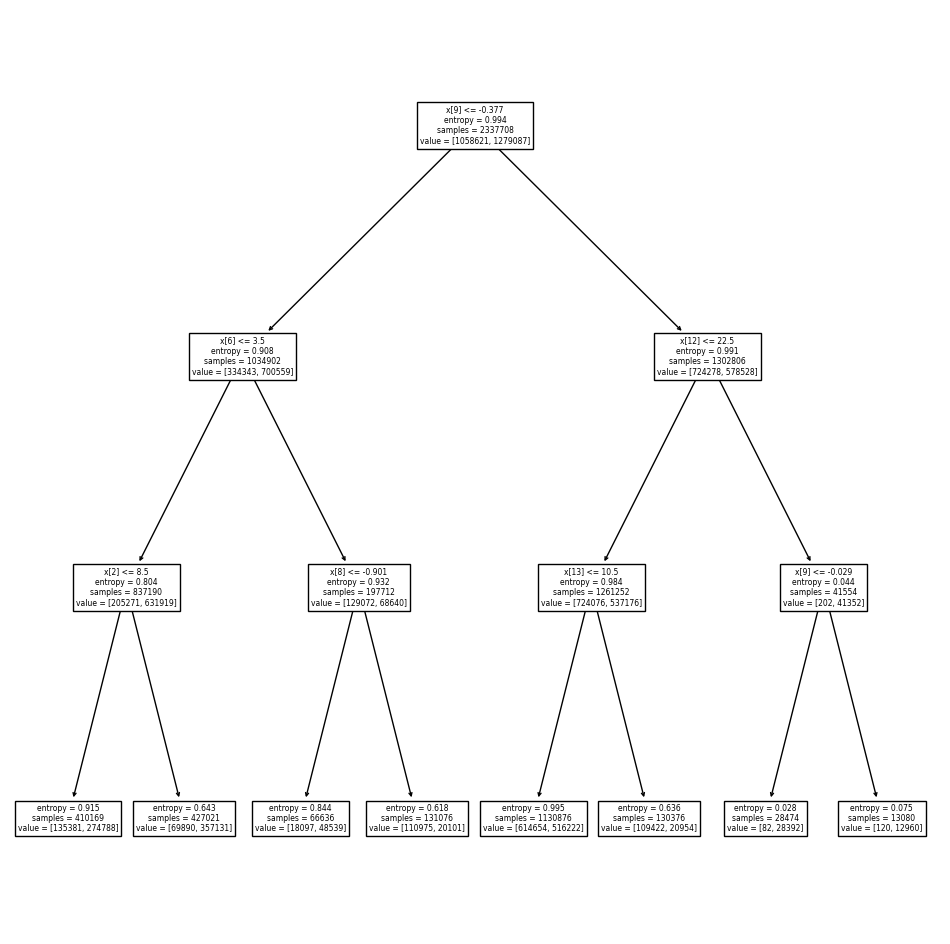

In [36]:
plt.figure(figsize=(12, 12))
plot_tree(model_fitted["DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)"])

## Catboost

In [32]:
only_categorial_df = df_train.select_dtypes(include='object')
only_categorial_df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [33]:
cat_cols = []
for col in only_categorial_df:
    cat_cols.append(col)
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [29]:
# cbc = CatBoostClassifier(
#            iterations=700,
#            depth=6,
#            learning_rate=0.1,
#            loss_function='Logloss',
#            task_type = 'GPU',
#            cat_features=cat_cols,
#            verbose=100
#     )

In [34]:
X = df_train_with_normalize.drop('class', axis=1)
y = df_train_with_normalize['class']

In [37]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True)
test_pool = Pool(df_test_with_normalize, cat_features=cat_cols)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    cbc = CatBoostClassifier(
           iterations=700,
           depth=6,
           learning_rate=0.1,
           loss_function='Logloss',
           task_type = 'GPU',
           cat_features=cat_cols,
           verbose=100
    )

    train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    cbc.fit(train_pool)
    models.append(cbc)
    data.append(test_pool)

    predict_pool = Pool(X_test, cat_features=cat_cols)
    predictions = cbc.predict(predict_pool)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.4f}")


[      0       1       2 ... 3116942 3116943 3116944]
[      7       9      12 ... 3116933 3116937 3116938]
0:	learn: 0.6328545	total: 218ms	remaining: 2m 32s
100:	learn: 0.0511546	total: 22.2s	remaining: 2m 11s
200:	learn: 0.0441310	total: 42.5s	remaining: 1m 45s
300:	learn: 0.0427300	total: 1m 2s	remaining: 1m 22s
400:	learn: 0.0420102	total: 1m 22s	remaining: 1m 1s
500:	learn: 0.0414919	total: 1m 41s	remaining: 40.5s
600:	learn: 0.0410337	total: 2m 2s	remaining: 20.2s
699:	learn: 0.0406740	total: 2m 22s	remaining: 0us
[      0       4       5 ... 3116940 3116942 3116943]
[      1       2       3 ... 3116935 3116941 3116944]
0:	learn: 0.6419795	total: 209ms	remaining: 2m 25s
100:	learn: 0.0507715	total: 22.3s	remaining: 2m 12s
200:	learn: 0.0440295	total: 42.8s	remaining: 1m 46s
300:	learn: 0.0426172	total: 1m 2s	remaining: 1m 22s
400:	learn: 0.0418788	total: 1m 22s	remaining: 1m 1s
500:	learn: 0.0413871	total: 1m 42s	remaining: 40.6s
600:	learn: 0.0409090	total: 2m 2s	remaining: 20.

In [38]:
# Просто ради проверки
predictions = cbc.predict(test_pool)
predictions

array([0, 1, 1, ..., 1, 0, 0])

## LightGMB

In [35]:
# clf = LGBMClassifier(
#     objective='binary',
#     metric='binary-error',
#     num_leaves=99,
#     learning_rate=0.1,
#     n_estimators=550,
#     max_depth= 19,
#     random_state=21
# )


In [39]:
X = encoded_df_train.drop('class', axis=1)
y = encoded_df_train['class']
# clf.fit(X, y)
# predictions = clf.predict(encoded_df_test)

In [40]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = LGBMClassifier(
        objective='binary',
        metric='binary-error',
        num_leaves=99,
        learning_rate=0.1,
        n_estimators=550,
        max_depth= 19,
        random_state=21
    )
    
    clf.fit(X_train, y_train)
    models.append(clf)
    data.append(encoded_df_test)
    
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.4f}")


[ 623389  623390  623391 ... 3116942 3116943 3116944]
[     0      1      2 ... 623386 623387 623388]
[LightGBM] [Info] Number of positive: 1364008, number of negative: 1129548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.805054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547013 -> initscore=0.188610
[LightGBM] [Info] Start training from score 0.188610
[      0       1       2 ... 3116942 3116943 3116944]
[ 623389  623390  623391 ... 1246775 1246776 1246777]
[LightGBM] [Info] Number of positive: 1364441, number of negative: 1129115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.922551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Numbe

In [43]:
predictions = clf.predict(encoded_df_test)
predictions

array([0, 1, 1, ..., 1, 0, 0])

## XGBoost

In [44]:
cat_cols_train = df_train.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_xgb = df_train_with_normalize.copy()
test_xgb = df_test_with_normalize.copy()

train_xgb[cat_cols_train] = ordinal_encoder.fit_transform(df_train_with_normalize[cat_cols_train].astype(str))
test_xgb[cat_cols_train] = ordinal_encoder.transform(df_test_with_normalize[cat_cols_train].astype(str))

In [45]:
# mattews metrics for this competiton
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [46]:
X = train_xgb.drop('class', axis=1)
y = train_xgb['class']

In [73]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
#                                                     shuffle=True, stratify=df_train['class'])

In [53]:
# Define the parameters for the XGBoost classifier
params = {
    'n_estimators': 800,
    'alpha': 0.0002,
    'subsample': 0.60,
    'colsample_bytree': 0.4,
    'max_depth': 13, 
    'min_child_weight': 10,
    'learning_rate': 0.002,
    'gamma': 5.6e-08,
    'tree_method': 'hist',
    'device': "cuda",
#     'tree_method': 'gpu_hist',
}

# # Initialize the XGBClassifier with the specified parameters
# xgbclf = XGBClassifier(**params, tree_method='gpu_hist')

# # Fit the model on the training data and evaluate using the MCC metric
# xgbclf.fit(
#     X_train, 
#     y_train, 
#     eval_set=[(X_test, y_test)],
#     eval_metric=mcc_metric,
# #     early_stopping_rounds=100,
#     verbose=200,
# )

In [55]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgbclf = XGBClassifier(**params)
    
    # xgbclf.fit(X_train, y_train)
    xgbclf.fit(
        X_train, 
        y_train, 
        eval_set=[(X_test, y_test)],
        eval_metric=mcc_metric,
        verbose=200,
    )
    models.append(xgbclf)
    data.append(test_xgb)
    
    predictions = xgbclf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.4f}")


[      0       1       2 ... 3116941 3116943 3116944]
[      4      11      16 ... 3116925 3116936 3116942]


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68755	validation_0-mcc:0.00000
[200]	validation_0-logloss:0.47334	validation_0-mcc:0.97477
[400]	validation_0-logloss:0.34078	validation_0-mcc:0.98038
[600]	validation_0-logloss:0.25503	validation_0-mcc:0.98114
[799]	validation_0-logloss:0.19493	validation_0-mcc:0.98142
[      0       4       6 ... 3116942 3116943 3116944]
[      1       2       3 ... 3116937 3116938 3116941]


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68741	validation_0-mcc:0.00000
[200]	validation_0-logloss:0.47301	validation_0-mcc:0.97507
[400]	validation_0-logloss:0.34042	validation_0-mcc:0.98022
[600]	validation_0-logloss:0.25479	validation_0-mcc:0.98083
[799]	validation_0-logloss:0.19476	validation_0-mcc:0.98116
[      1       2       3 ... 3116940 3116941 3116942]
[      0       7       8 ... 3116939 3116943 3116944]


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68753	validation_0-mcc:0.00000
[200]	validation_0-logloss:0.47311	validation_0-mcc:0.97466
[400]	validation_0-logloss:0.34056	validation_0-mcc:0.97991
[600]	validation_0-logloss:0.25496	validation_0-mcc:0.98063
[799]	validation_0-logloss:0.19489	validation_0-mcc:0.98107
[      0       1       2 ... 3116942 3116943 3116944]
[      6       9      13 ... 3116933 3116934 3116940]


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68756	validation_0-mcc:0.00000
[200]	validation_0-logloss:0.47319	validation_0-mcc:0.97493
[400]	validation_0-logloss:0.34051	validation_0-mcc:0.98009
[600]	validation_0-logloss:0.25489	validation_0-mcc:0.98080
[799]	validation_0-logloss:0.19482	validation_0-mcc:0.98122
[      0       1       2 ... 3116942 3116943 3116944]
[     14      27      37 ... 3116921 3116922 3116926]


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68775	validation_0-mcc:0.00000
[200]	validation_0-logloss:0.47319	validation_0-mcc:0.97412
[400]	validation_0-logloss:0.34084	validation_0-mcc:0.97990
[600]	validation_0-logloss:0.25522	validation_0-mcc:0.98060
[799]	validation_0-logloss:0.19527	validation_0-mcc:0.98088
Average Accuracy: 0.9907


In [56]:
# Просто ради проверки
predictions = xgbclf.predict(test_xgb)
predictions

array([0, 1, 1, ..., 1, 0, 0])

## Together

In [58]:
def predict_proba_ensemble(models, test_data):
    probas = np.zeros((test_data[0].shape[0], len(models)))
    for i, model in enumerate(models):
        proba = model.predict_proba(test_data[i])[:, 1]
        probas[:, i] = proba
    final_probas = np.mean(probas, axis=1)
    final_predictions = (final_probas > 0.5).astype(int)
    return final_predictions

In [59]:
final_predictions = predict_proba_ensemble(models, data)
final_predictions

array([0, 1, 1, ..., 1, 0, 0])

# Submit

In [60]:
sample_df = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv').drop('id', axis=1)
sample_df['class'] = final_predictions
sample_df

,id,class
0,3116945,0
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,0
...,...,...
2077959,5194904,1
2077960,5194905,1
2077961,5194906,1
2077962,5194907,0


In [61]:
sample_df['class'] = sample_df['class'].map({0:'e', 1:'p'})
sample_df

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [62]:
sample_df.to_csv('submission_15_models.csv', index = False)